In [18]:


import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, ELU
import numpy as np

from matplotlib import pyplot


import sys



In [19]:
print(f'Using python version: {sys.version}\n');
print(f'Using TensorFlow version: {tf.version.VERSION}');
print(f'Using numpy version: {np.version.version}');


Using python version: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]

Using TensorFlow version: 2.5.0
Using numpy version: 1.19.5


In [20]:
# load in the data 

full_dataset = np.load("ml_dataset.npy");

In [21]:
# split up the data into the x and y halves

x_set = full_dataset[0];
y_set = full_dataset[1];

In [22]:
# split the data into training and testing sets


half = int(len(x_set)/2);

print(f'half: {half}');
x_train = x_set[0:half];
x_test = x_set[half:];

y_train = y_set[0:half];
y_test = y_set[half:];



half: 151


In [23]:
# print some data diagnostics to ensure we correctly obtained data sets

print(f"x_set shape: {x_set.shape}");
print(f"y_set shape: {y_set.shape}");


training_point_number = x_set.shape[1];
print(f"number of points in each graph set: {training_point_number}");


print("number of x training data sets:");
print(len(x_train[0:]));


print("number of y training data sets:");
print(len(y_train[0:]));

assert(len(x_train) == len(y_train));
assert(len(x_test) == len(y_test));
assert(x_set.shape == y_set.shape);

print(f"\nNumber of training graph-solution sets: {len(x_train)}")


print(f"Number of testing graph-solution sets: {len(x_test)}")



print(f"\nDataset shape: {x_set.shape}")



x_set shape: (302, 500)
y_set shape: (302, 500)
number of points in each graph set: 500
number of x training data sets:
151
number of y training data sets:
151

Number of training graph-solution sets: 151
Number of testing graph-solution sets: 151

Dataset shape: (302, 500)


In [24]:
# reshape the x data into a column of 1 element rows for the LSTM


x_train = x_train.reshape(x_train.shape[0],training_point_number,1);
x_test = x_test.reshape(x_test.shape[0],training_point_number,1);

print(x_train.shape)

(151, 500, 1)


In [25]:
#build the model by stacking layers


model = tf.keras.models.Sequential()

model.add(LSTM(training_point_number));


model.add(Dense(training_point_number,activation='tanh'));


model.add(Dense(training_point_number,activation='exponential'));


print("model built");


model built


In [26]:
#print(y_train[0])

In [27]:
# get the predictions for the second datapoint
predictions = model(x_train)

# print the raw predictions for that datapoint. Note that these are "logits" or "log-odds" scores, which is related to the probability, 
# and also is the inverse of the sigmoid function
print("logits prediction: ");
print(predictions[0]);

# we can use the softmax function to convert these logits to probabilities for each preciction class
#print("odds prediction: ");
#print(tf.nn.softmax(predictions).numpy()[0]);


print(f'shape: {predictions.shape}');


logits prediction: 
tf.Tensor(
[1.         0.99999994 0.99999994 1.         1.         1.0000001
 0.99999994 1.0000001  1.         1.         1.         0.99999994
 1.         1.0000002  1.0000001  0.9999999  1.0000001  1.0000001
 1.         0.99999994 0.99999994 1.         1.         0.99999994
 1.0000001  0.9999999  1.         0.99999994 0.99999994 1.
 1.         0.9999999  0.9999998  1.0000002  0.99999994 1.0000001
 1.         1.         1.         1.         0.9999999  0.99999994
 1.0000001  1.0000001  1.         1.         0.99999994 0.99999994
 1.         1.         1.0000001  0.9999999  1.         1.
 0.99999994 1.         1.         1.         0.9999999  0.99999994
 0.9999999  1.         1.0000001  1.         1.         1.
 1.         1.0000001  1.         0.99999976 1.         0.99999994
 1.         1.         0.99999994 0.9999999  1.0000002  1.
 0.99999994 0.9999999  1.         0.9999999  1.         0.9999999
 1.0000001  0.9999999  1.         0.99999994 1.0000001  1.0000001
 

In [28]:
# get the loss function as a MeanSquaredError loss from tf.keras.losses. 
loss_fn = tf.keras.losses.MeanSquaredError();

print("loss:");
print(loss_fn(y_train[0],predictions[0]).numpy());

loss:
685337100.0


In [29]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5);

model.compile(loss=loss_fn,optimizer=opt,metrics=['accuracy']);


In [30]:
model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test), batch_size=10);

Epoch 1/60
16/16 [==============================] - 57s 3s/step - loss: 229957360.0000 - accuracy: 0.0000e+00 - val_loss: 45618112.0000 - val_accuracy: 0.0000e+00
Epoch 2/60
16/16 [==============================] - 54s 3s/step - loss: 229878096.0000 - accuracy: 0.0000e+00 - val_loss: 45508740.0000 - val_accuracy: 0.0000e+00
Epoch 3/60
16/16 [==============================] - 53s 3s/step - loss: 229395536.0000 - accuracy: 0.0000e+00 - val_loss: 45024272.0000 - val_accuracy: 0.0000e+00
Epoch 4/60
16/16 [==============================] - 53s 3s/step - loss: 227350576.0000 - accuracy: 0.0000e+00 - val_loss: 43225588.0000 - val_accuracy: 0.0000e+00
Epoch 5/60
16/16 [==============================] - 53s 3s/step - loss: 219366928.0000 - accuracy: 0.0000e+00 - val_loss: 36841592.0000 - val_accuracy: 0.0000e+00
Epoch 6/60
16/16 [==============================] - 54s 3s/step - loss: 186577328.0000 - accuracy: 0.0000e+00 - val_loss: 24934528.0000 - val_accuracy: 0.0000e+00
Epoch 7/60
16/16 [====

In [31]:

print(model.summary());

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 500)               1004000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
Total params: 1,505,000
Trainable params: 1,505,000
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
predictions = model(x_train);

(151, 500)
(500,)


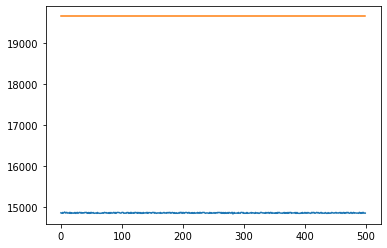

In [35]:
graphnum = 25;

first_graph = predictions[graphnum];
print(predictions.shape);

x = np.linspace(0,500,500);
print(x.shape)

pyplot.plot(first_graph);
pyplot.plot(y_set[graphnum])

In [34]:
print(first_graph)

tf.Tensor(
[14858.807  14851.341  14847.56   14868.375  14852.672  14862.18
 14877.75   14868.36   14852.813  14868.445  14868.205  14851.128
 14853.494  14856.086  14868.63   14846.611  14868.63   14846.483
 14854.485  14856.242  14846.923  14855.193  14855.874  14868.147
 14846.498  14847.701  14864.561  14868.389  14846.583  14856.157
 14868.247  14868.318  14857.12   14868.304  14852.262  14861.627
 14852.615  14862.023  14855.236  14868.233  14868.46   14865.071
 14868.488  14849.642  14847.573  14867.581  14849.047  14846.923
 14868.389  14853.4795 14868.389  14857.518  14857.347  14866.376
 14851.596  14847.573  14852.162  14854.287  14852.233  14846.555
 14868.247  14852.729  14850.406  14847.856  14846.725  14847.63
 14850.42   14850.378  14861.797  14852.687  14848.862  14868.743
 14867.907  14860.989  14855.406  14864.419  14852.007  14852.375
 14847.531  14866.333  14846.455  14850.477  14867.566  14855.902
 14853.238  14852.445  14867.765  14868.389  14852.077  14868.262
 